### Check the number of classes of the dataset


Number of instances: 19924 instances.


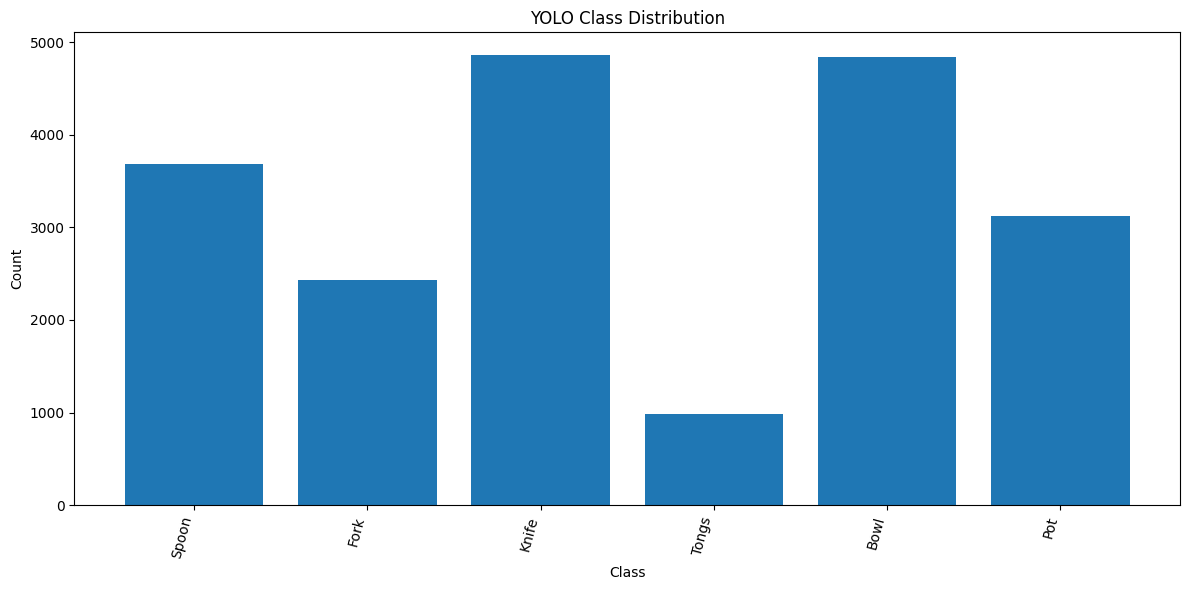

In [5]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# --- CONFIG ---
labels_dir = r".\resources\dataset_Chicken-Tool-Dataset-7\train\labels"

# Class names mapping
CLASS_NAMES = {
    0: "Spoon",
    1: "Fork",
    2: "Knife",
    3: "Tongs",
    4: "Bowl",
    5: "Pot",
}

# --- COUNTING ---
counter = Counter()
num_instance = 0

for file in os.listdir(labels_dir):
    if not file.endswith(".txt"):
        continue

    path = os.path.join(labels_dir, file)

    with open(path, "r") as f:
        for line in f:
            num_instance += 1
            parts = line.strip().split()
            if len(parts) == 0:
                continue

            class_id = int(parts[0])
            counter[class_id] += 1

# Sort counts by class id
sorted_ids = sorted(counter.keys())

# Prepare data
labels = [CLASS_NAMES[i] for i in sorted_ids]
counts = [counter[i] for i in sorted_ids]

# --- VISUALIZATION ---
print(f"Number of instances: {num_instance} instances.")
plt.figure(figsize=(12, 6))
plt.bar(labels, counts)
plt.xticks(rotation=75, ha='right')
plt.title("YOLO Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Test model with camera


In [ ]:
from ultralytics import YOLO
import cv2

# -----------------------------
# Custom class names
# -----------------------------
CLASS_NAMES = {
    0: "Spoon",
    1: "Fork",
    2: "Knife",
    3: "Tongs",
    4: "Bowl",
    5: "Pot"
}

# -----------------------------
# Load your YOLO model
# -----------------------------
MODEL_PATH = r"C:\Users\ADMIN\Downloads\best.pt"
model = YOLO(MODEL_PATH)
# -----------------------------
# Open laptop webcam
# -----------------------------
cap = cv2.VideoCapture(0)  # 0 = default camera

if not cap.isOpened():
    print("Failed to open webcam.")
    exit()

print("Press 'ESC' to exit.")

# -----------------------------
# Live webcam detection loop
# -----------------------------
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO inference
    results = model(frame, stream=True)

    # Draw results frame-by-frame
    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])
            label = CLASS_NAMES.get(cls, f"Class {cls}")
            conf = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Draw bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Draw label and confidence
            text = f"{label} {conf:.2f}"
            cv2.putText(frame, text, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Display webcam feed
    cv2.imshow("YOLO Webcam Detection", frame)

    # ESC key to exit
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()